In [1]:
#plotting the linear fit and log normal fit on top of each other
import numpy as np
import yt
import time
from yt.funcs import mylog
import matplotlib.pyplot as plt
mylog.setLevel(40) #prevents warning
plt.style.use('default')
import scipy
from scipy import optimize
from pdf_fitter import *

In [2]:
#only cell in need of changing between runs
inputfile = ('/scratch/jak491/npz_storage/covering_grid_den0.npz','/scratch/jak491/npz_storage/covering_grid_den1.npz','/scratch/jak491/npz_storage/covering_grid_den2.npz', '/scratch/jak491/npz_storage/covering_grid_den3.npz', '/scratch/jak491/npz_storage/covering_grid_den4.npz', '/scratch/jak491/npz_storage/covering_grid_den5.npz', '/scratch/jak491/npz_storage/covering_grid_den_high.npz')
percent = 5
perc = '5'
titles = ('gravity ','turbulence', 'magnetic fields', 'all+ = outflows')
#titles = ('10% SFE\nG','10% SFE\nG+T','10% SFE\nG+T+M','6% SFE\nG+T+M+P' )
sigma_limit = .75
slope_limit = 1

In [3]:
#define Linear function
def linear(x, m, b): 
    return m*x + b
    
#define Log Normal function
def lognorm(x,mu,sigma):
   return np.log((1/(np.sqrt(2*np.pi*sigma**2)))*(np.exp(-((x-mu)**2)/(2*sigma**2))))
 

In [4]:
#plot setup
d = {}
variable_name =('density_g','density_gt','density_gtm', 'density_gtmp')
input_file = inputfile[percent]
plot_data = np.load(input_file, allow_pickle=True)

starting
0
1
2
3


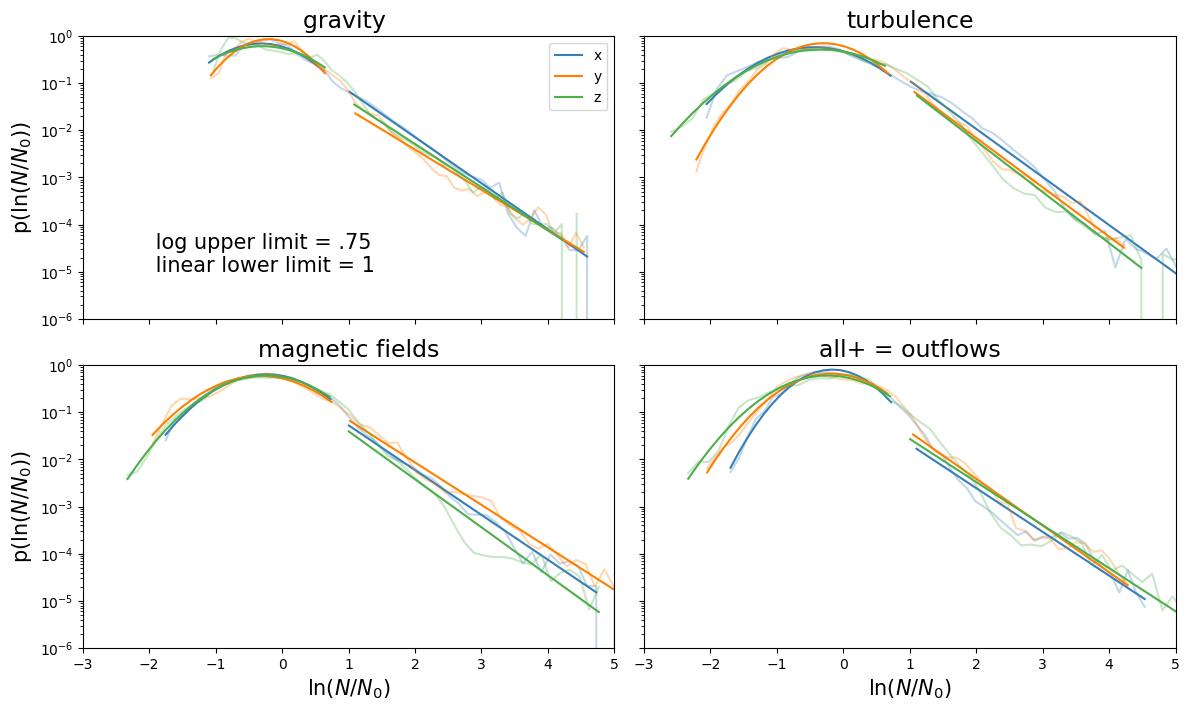

time: 1.0408880472183228


In [5]:
#main processing cell. 
start = time.time()
print('starting')
slopes = []
error = []
fig, ax = plt.subplots(nrows=2,ncols=2, sharex=True, sharey=True,figsize=(12,8))
ax =ax.ravel()
#plt.suptitle('Column Densities with ' + perc + '% SFE', size =26)
ax[0].annotate(' log upper limit = .75\n linear lower limit = 1',[-2,1e-5], size =15)

ax[0].plot(100,100, color = '#377eb8', alpha =1)
ax[0].plot(100,100, color = '#ff7f00', alpha =1)
ax[0].plot(100,100, color = '#4daf4a', alpha =1)
ax[0].legend([ 'x', 'y', 'z'])
b = 0

for n in range(4):
    den = plot_data[plot_data.files[n]]
    color_list = ('#377eb8', '#ff7f00', '#4daf4a')
    print(n)     #for time keeping
    
    for a in (range(3)):

        log_den_d = plot_data[plot_data.files[4+b]]
        counts_d, binS_d = np.histogram(log_den_d,bins=50, density= True)
        b = b+1
        
        bin_list = []
        for i in range(len(binS_d)-1):
            bin_i=(binS_d[i]+binS_d[i+1])/2
            bin_list.append(bin_i)
        #create subrange and plots linear fit
        x =[]
        y = []
        x_log =[]
        y_log = []
        for i in range(len(bin_list)):
            if bin_list[i] > slope_limit:
                if counts_d[i] > 0:
                        x.append(bin_list[i])
                        y.append(counts_d[i])
                else:
                    break
        for i in range(len(bin_list)):
            if bin_list[i] < sigma_limit:
                    x_log.append(bin_list[i])
                    y_log.append(counts_d[i])
            else:
                break
        
        lin_param, lin_con = scipy.optimize.curve_fit(linear, x, np.log(y))
        y = linear(np.array(x),lin_param[0],lin_param[1])
        
        log_param, log_con = scipy.optimize.curve_fit(lognorm, x_log, np.log(y_log))
        y_log = lognorm(np.array(x_log),log_param[0],log_param[1])
        
        slopes.append(lin_param[0])
        error.append(np.sqrt(np.diag(lin_con))[0])
        ax[n].plot(bin_list, counts_d, color = color_list[a], alpha = .3)
        ax[n].plot(x,np.exp(y), color = color_list[a])
        ax[n].plot(x_log,np.exp(y_log), color = color_list[a])

        
    if n > 1:
        ax[n].set_xlabel(r'ln($N/N_0$)', size=15)
    if n == 0 or n == 2:
        ax[n].set_ylabel(r'p(ln($N/N_0$))', size=15)
    


    ax[n].set_title(titles[n], size = 17)
    ax[n].set_yscale('log')
    ax[n].set_ylim(10**(-6),1)
    ax[n].set_xlim(-3,5)
    
plt.tight_layout()
plt.subplots_adjust(top=.85)
plt.savefig('combined_column_lim,75_4lv_'+perc+'%', bbox_inches='tight')
plt.show()

file = open("comb_slope_" +perc+"%.txt", "w")
str_dictionary = repr(slopes)
file.write(str_dictionary + "\n")
str_dictionary = repr(error)
file.write(str_dictionary + "\n")
file.close()

end = time.time()
print("time:",(end-start)/60)

starting
0
1
2
3


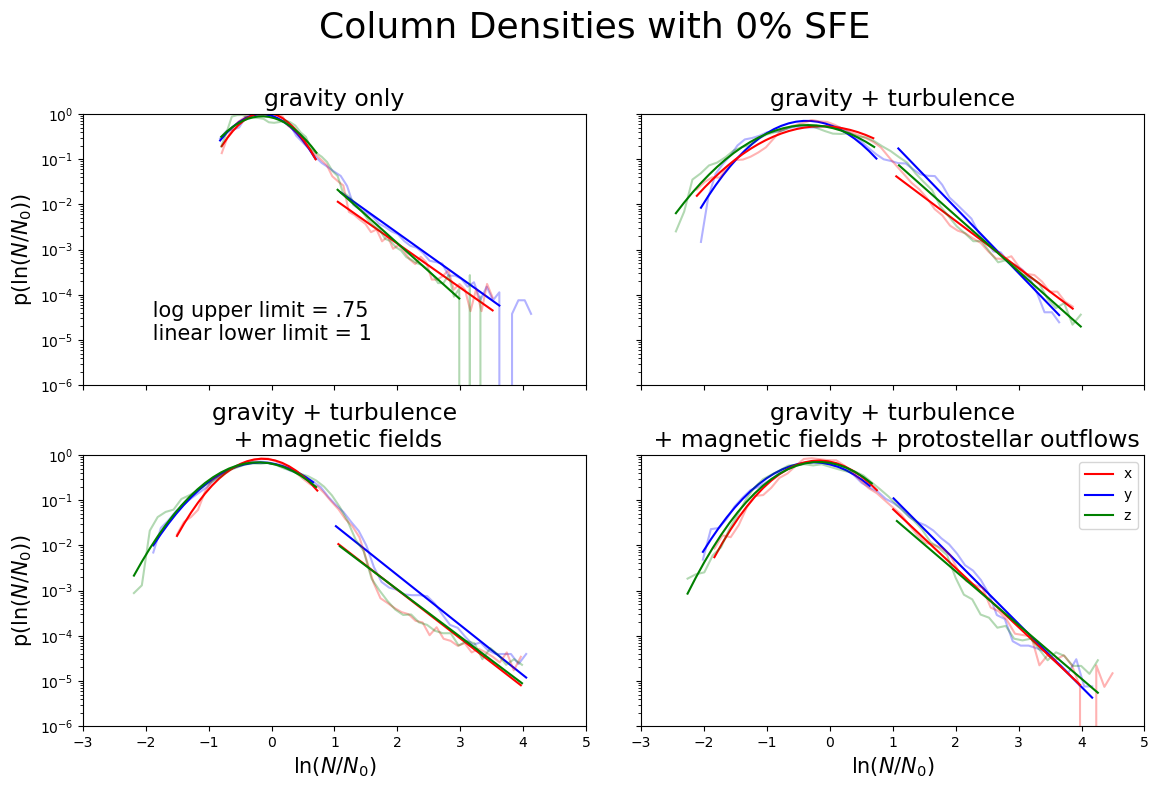

starting
0
1
2
3


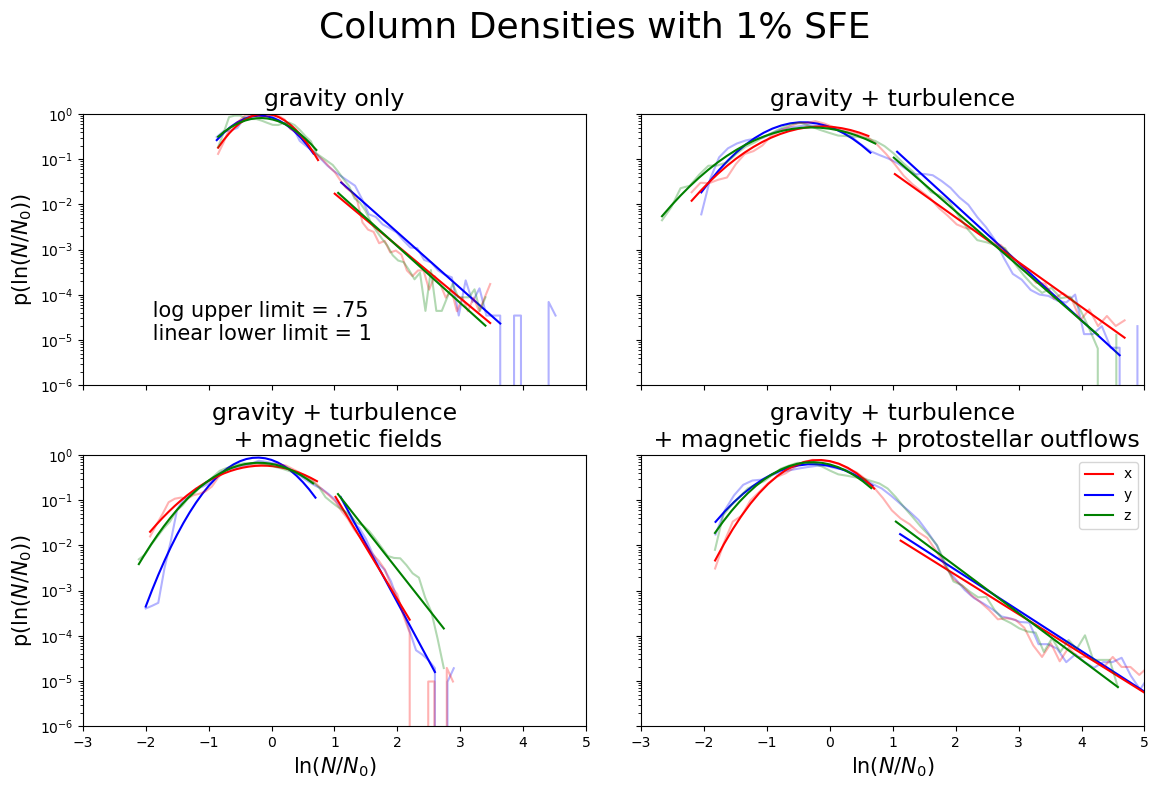

starting
0
1
2
3


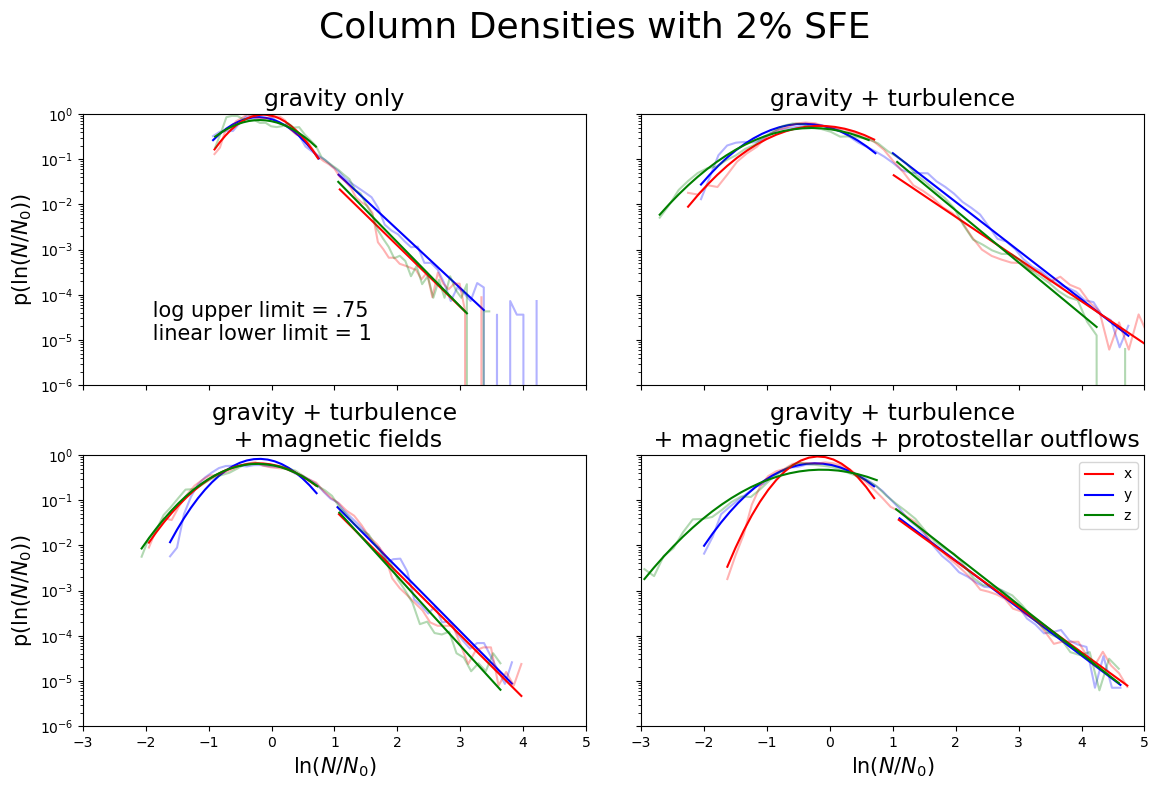

starting
0
1
2
3


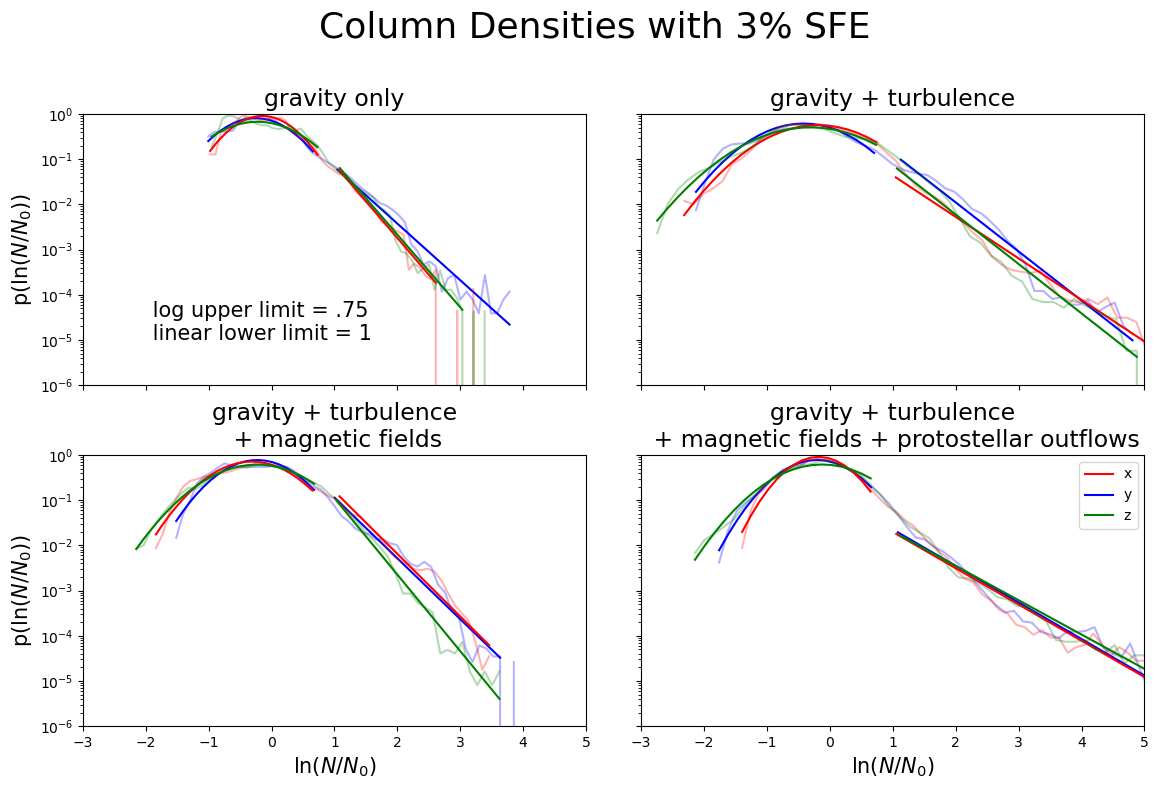

starting
0
1
2
3


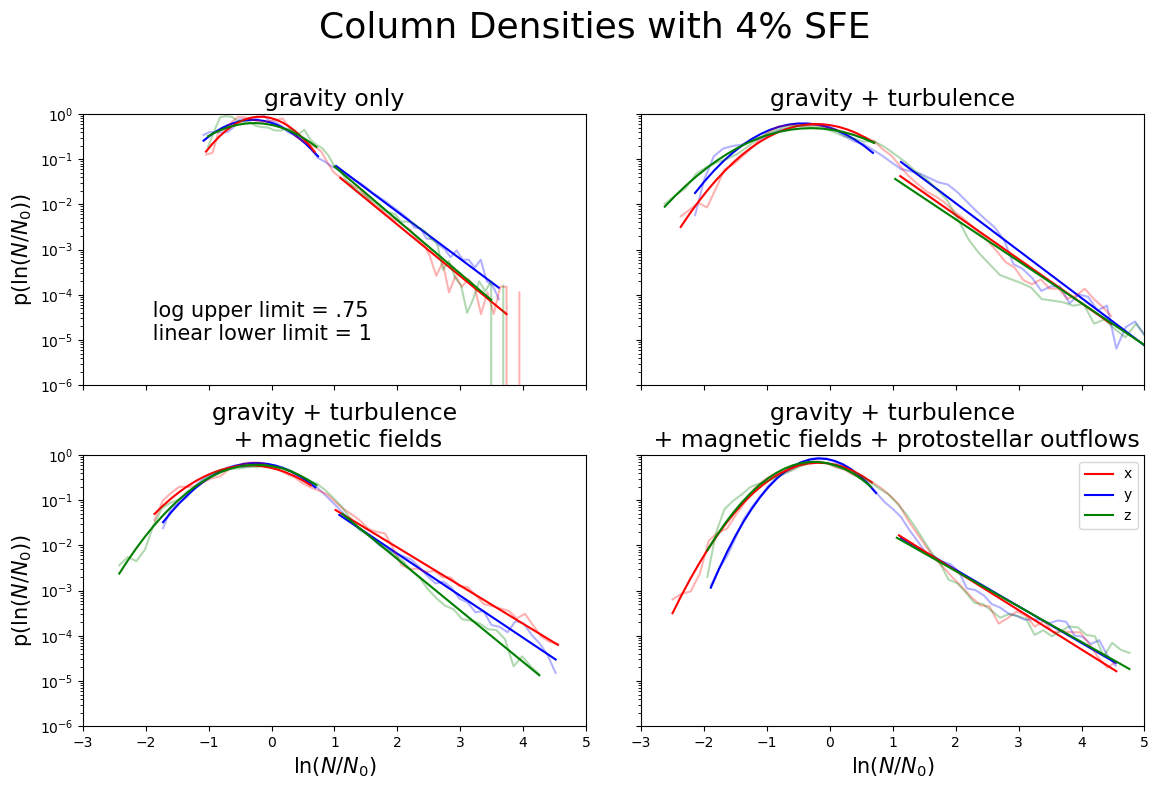

starting
0
1
2
3


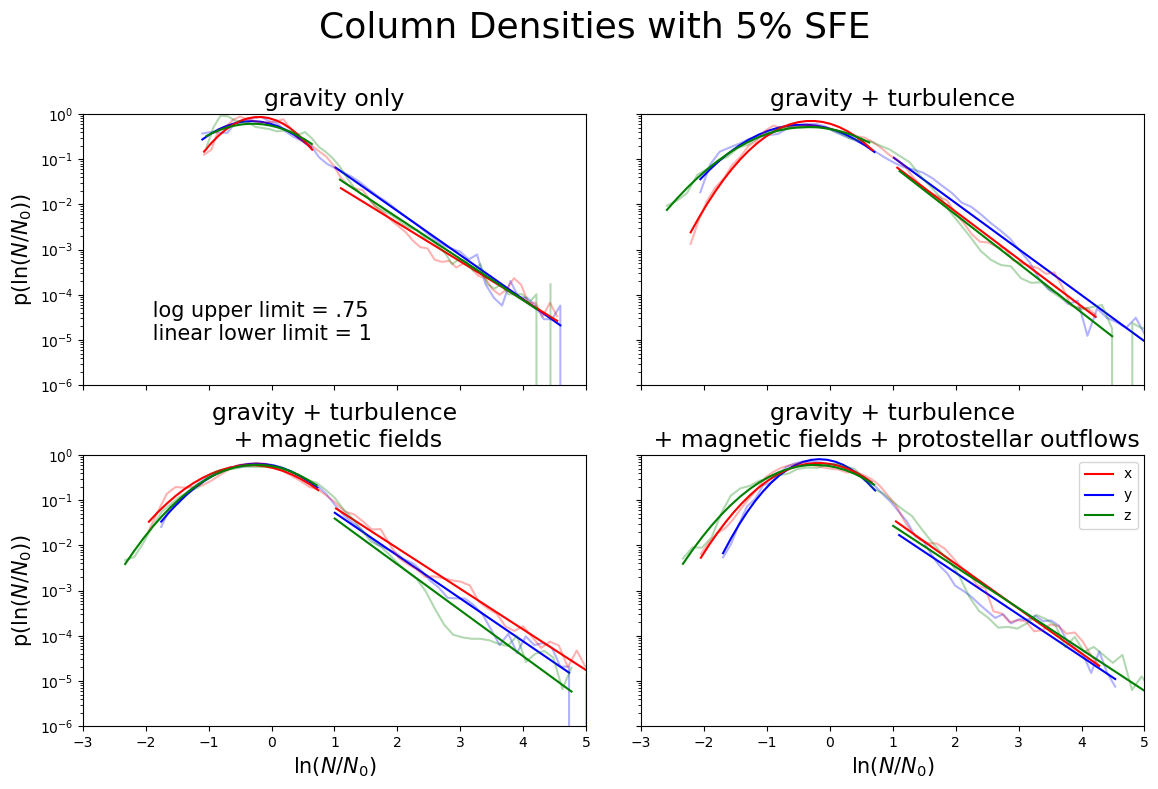

time: 1.134280836582184


In [17]:
#only cell in need of changing between runs
inputfile = ('/scratch/jak491/npz_storage/covering_grid_den0.npz','/scratch/jak491/npz_storage/covering_grid_den1.npz','/scratch/jak491/npz_storage/covering_grid_den2.npz', '/scratch/jak491/npz_storage/covering_grid_den3.npz', '/scratch/jak491/npz_storage/covering_grid_den4.npz', '/scratch/jak491/npz_storage/covering_grid_den5.npz', '/scratch/jak491/npz_storage/covering_grid_den_high.npz')
percent_t = range(6)
perc_t = ('0','1','2','3','4','5')
titles = ('gravity only', 'gravity + turbulence','gravity + turbulence\n + magnetic fields', 'gravity + turbulence\n + magnetic fields + protostellar outflows')
#titles = ('10% SFE\nG','10% SFE\nG+T','10% SFE\nG+T+M','6% SFE\nG+T+M+P' )
sigma_limit = .75
slope_limit = 1

#define Linear function
def linear(x, m, b): 
    return m*x + b
    
#define Log Normal function
def lognorm(x,mu,sigma):
   return np.log((1/(np.sqrt(2*np.pi*sigma**2)))*(np.exp(-((x-mu)**2)/(2*sigma**2))))
 
for aa in range(6):
    percent = aa
    perc = perc_t[aa]
    #plot setup
    d = {}
    variable_name =('density_g','density_gt','density_gtm', 'density_gtmp')
    input_file = inputfile[percent]
    plot_data = np.load(input_file, allow_pickle=True)
    
        #main processing cell. 
    start = time.time()
    print('starting')
    slopes = []
    error = []
    fig, ax = plt.subplots(nrows=2,ncols=2, sharex=True, sharey=True,figsize=(12,8))
    ax =ax.ravel()
    plt.suptitle('Column Densities with ' + perc + '% SFE', size =26)
    ax[0].annotate(' log upper limit = .75\n linear lower limit = 1',[-2,1e-5], size =15)

    b = 0

    for n in range(4):
        den = plot_data[plot_data.files[n]]
        color_list = ('b', 'r', 'green')
        print(n)     #for time keeping

        for a in (range(3)):

            log_den_d = plot_data[plot_data.files[4+b]]
            counts_d, binS_d = np.histogram(log_den_d,bins=50, density= True)
            b = b+1

            bin_list = []
            for i in range(len(binS_d)-1):
                bin_i=(binS_d[i]+binS_d[i+1])/2
                bin_list.append(bin_i)
            #create subrange and plots linear fit
            x =[]
            y = []
            x_log =[]
            y_log = []
            for i in range(len(bin_list)):
                if bin_list[i] > slope_limit:
                    if counts_d[i] > 0:
                            x.append(bin_list[i])
                            y.append(counts_d[i])
                    else:
                        break
            for i in range(len(bin_list)):
                if bin_list[i] < sigma_limit:
                        x_log.append(bin_list[i])
                        y_log.append(counts_d[i])
                else:
                    break

            lin_param, lin_con = scipy.optimize.curve_fit(linear, x, np.log(y))
            y = linear(np.array(x),lin_param[0],lin_param[1])

            log_param, log_con = scipy.optimize.curve_fit(lognorm, x_log, np.log(y_log))
            y_log = lognorm(np.array(x_log),log_param[0],log_param[1])

            ax[n].plot(bin_list, counts_d, color = color_list[a], alpha = .3)
            ax[n].plot(x,np.exp(y), color = color_list[a])
            ax[n].plot(x_log,np.exp(y_log), color = color_list[a])


        if n > 1:
            ax[n].set_xlabel(r'ln($N/N_0$)', size=15)
        if n == 0 or n == 2:
            ax[n].set_ylabel(r'p(ln($N/N_0$))', size=15)

        plt.plot(100,100, color = 'r', alpha =1)
        plt.plot(100,100, color = 'b', alpha =1)
        plt.plot(100,100, color = 'g', alpha =1)
        plt.legend([ 'x', 'y', 'z'])

        ax[n].set_title(titles[n], size = 17)
        ax[n].set_yscale('log')
        ax[n].set_ylim(10**(-6),1)
        ax[n].set_xlim(-3,5)

    plt.tight_layout()
    plt.subplots_adjust(top=.85)
    plt.savefig('combined_column_lim,75_4lv_'+perc+'%', bbox_inches='tight')
    plt.show()


end = time.time()
print("time:",(end-start)/60)

starting
0


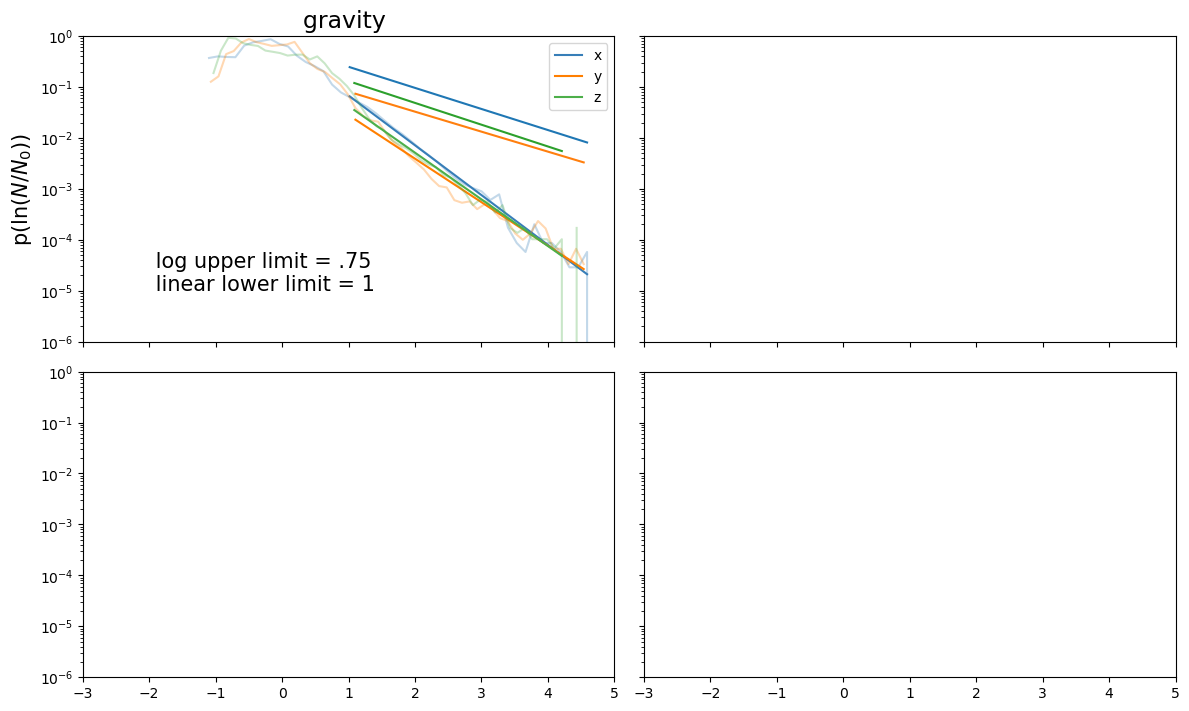

time: 0.12575577894846598


In [8]:
#linear and spline slope

spline_slope = [-0.9527496740121277,-0.9031079340851093,-0.9844578430661135,-1.1611387922421166, -1.068320092125942, -1.1085989644397198, -1.0200296800657034, -0.9755604804645975, -1.1072762185937681, -1.1143598596272581, -1.0166504584939777,-1.0809228193410456]

start = time.time()
print('starting')
slopes = []
error = []
fig, ax = plt.subplots(nrows=2,ncols=2, sharex=True, sharey=True,figsize=(12,8))
ax =ax.ravel()
#plt.suptitle('Column Densities with ' + perc + '% SFE', size =26)
ax[0].annotate(' log upper limit = .75\n linear lower limit = 1',[-2,1e-5], size =15)

ax[0].plot(100,100, color = '#377eb8', alpha =1)
ax[0].plot(100,100, color = '#ff7f00', alpha =1)
ax[0].plot(100,100, color = '#4daf4a', alpha =1)
ax[0].legend([ 'x', 'y', 'z'])
b = 0

for n in range(1):
    den = plot_data[plot_data.files[n]]
    color_list = ('#377eb8', '#ff7f00', '#4daf4a')
    print(n)     #for time keeping
    
    for a in (range(3)):

        log_den_d = plot_data[plot_data.files[4+b]]
        counts_d, binS_d = np.histogram(log_den_d,bins=50, density= True)
        b = b+1
        
        bin_list = []
        for i in range(len(binS_d)-1):
            bin_i=(binS_d[i]+binS_d[i+1])/2
            bin_list.append(bin_i)
        #create subrange and plots linear fit
        x =[]
        y = []
        x_log =[]
        y_log = []
        for i in range(len(bin_list)):
            if bin_list[i] > slope_limit:
                if counts_d[i] > 0:
                        x.append(bin_list[i])
                        y.append(counts_d[i])
                else:
                    break
        for i in range(len(bin_list)):
            if bin_list[i] < sigma_limit:
                    x_log.append(bin_list[i])
                    y_log.append(counts_d[i])
            else:
                break
        
        lin_param, lin_con = scipy.optimize.curve_fit(linear, x, np.log(y))
        y = linear(np.array(x),lin_param[0],lin_param[1])
        y_spline = linear(np.array(x), spline_slope[a+3*n],lin_param[1])
        log_param, log_con = scipy.optimize.curve_fit(lognorm, x_log, np.log(y_log))
        y_log = lognorm(np.array(x_log),log_param[0],log_param[1])
        
        slopes.append(lin_param[0])
        error.append(np.sqrt(np.diag(lin_con))[0])
        ax[n].plot(bin_list, counts_d, color = color_list[a], alpha = .3)
        ax[n].plot(x,np.exp(y), color = color_list[a])
        ax[n].plot(x,np.exp(y_spline))

        #ax[n].plot(x_log,np.exp(y_log), color = color_list[a])

        
    if n > 1:
        ax[n].set_xlabel(r'ln($N/N_0$)', size=15)
    if n == 0 or n == 2:
        ax[n].set_ylabel(r'p(ln($N/N_0$))', size=15)
    


    ax[n].set_title(titles[n], size = 17)
    ax[n].set_yscale('log')
    ax[n].set_ylim(10**(-6),1)
    ax[n].set_xlim(-3,5)
    
plt.tight_layout()
plt.subplots_adjust(top=.85)
plt.savefig('slope_spline_lim,75_4lv_'+perc+'%', bbox_inches='tight')
plt.show()

file = open("comb_slope_" +perc+"%.txt", "w")
str_dictionary = repr(slopes)
file.write(str_dictionary + "\n")
str_dictionary = repr(error)
file.write(str_dictionary + "\n")
file.close()

end = time.time()
print("time:",(end-start)/60)

starting
0
1
2
3


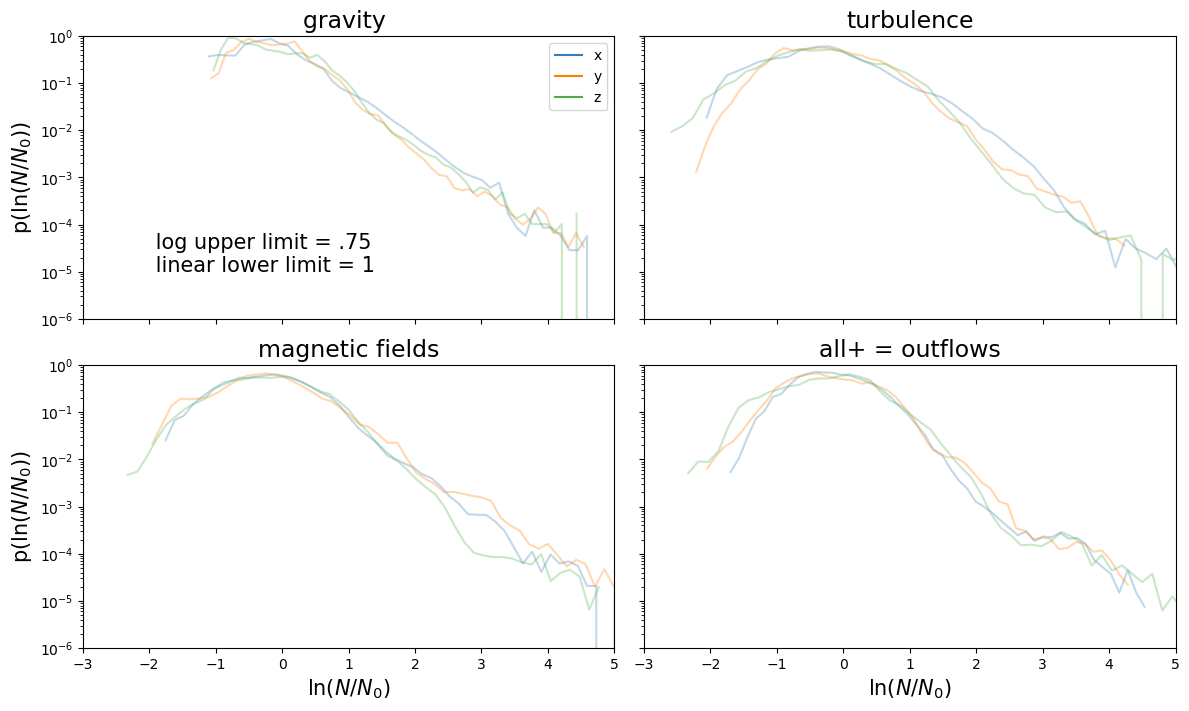

time: 1.135826794306437


In [6]:
#power law fitting. 
start = time.time()
print('starting')
slopes = []
error = []
fig, ax = plt.subplots(nrows=2,ncols=2, sharex=True, sharey=True,figsize=(12,8))
ax =ax.ravel()
#plt.suptitle('Column Densities with ' + perc + '% SFE', size =26)
ax[0].annotate(' log upper limit = .75\n linear lower limit = 1',[-2,1e-5], size =15)

ax[0].plot(100,100, color = '#377eb8', alpha =1)
ax[0].plot(100,100, color = '#ff7f00', alpha =1)
ax[0].plot(100,100, color = '#4daf4a', alpha =1)
ax[0].legend([ 'x', 'y', 'z'])
b = 0

for n in range(4):
    den = plot_data[plot_data.files[n]]
    color_list = ('#377eb8', '#ff7f00', '#4daf4a')
    print(n)     #for time keeping
    
    for a in (range(3)):
        log_den_d = plot_data[plot_data.files[4+b]]
        counts_d, binS_d = np.histogram(log_den_d,bins=50, density= True)
        b = b+1
        
        bin_list = []
        for i in range(len(binS_d)-1):
            bin_i=(binS_d[i]+binS_d[i+1])/2
            bin_list.append(bin_i)
        #create subrange and plots linear fit
        x =[]
        y = []
        x_log =[]
        y_log = []
        for i in range(len(bin_list)):
            if bin_list[i] > slope_limit:
                if counts_d[i] > 0:
                        x.append(bin_list[i])
                        y.append(counts_d[i])
                else:
                    break

        ax[n].plot(bin_list, counts_d, color = color_list[a], alpha = .3)
        #ax[n].plot(x,np.exp(y), color = color_list[a])


        
    if n > 1:
        ax[n].set_xlabel(r'ln($N/N_0$)', size=15)
    if n == 0 or n == 2:
        ax[n].set_ylabel(r'p(ln($N/N_0$))', size=15)
    


    ax[n].set_title(titles[n], size = 17)
    ax[n].set_yscale('log')
    ax[n].set_ylim(10**(-6),1)
    ax[n].set_xlim(-3,5)
    
plt.tight_layout()
plt.subplots_adjust(top=.85)
plt.savefig('combined_column_lim,75_4lv_'+perc+'%', bbox_inches='tight')
plt.show()

file = open("power_fit" +perc+"%.txt", "w")
str_dictionary = repr(slopes)
file.write(str_dictionary + "\n")
str_dictionary = repr(error)
file.write(str_dictionary + "\n")
file.close()

end = time.time()
print("time:",(end-start)/60)

In [12]:
xdata = bin_list
ydata = counts_d
params =-1
p0=-2
PLPLFit(xdata, ydata,params, p0, use_K21=True)

AttributeError: 'int' object has no attribute 'root_finding_lower_lim'

In [8]:
help(PLPLFit)

Help on function PLPLFit in module pdf_fitter:

PLPLFit(xdata, ydata, p0, params, use_K21=True, print_result=True)
    This function will return the fitted parameters directly. 
    Params: 
    xdata - the x values of the data
    ydata - the y values of the data
    p0 - the initial guess for fitting
    print_result - Set to True by default. To remove the output on the screen, add print_result=False to function call.

